In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!matplotlib inline

Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


## Functions

In [4]:
def getExpectedReturn(df, price_col_name, annualised=True, annualise_method="sophisticated"):
    """
    Returns the expected return of stock given price data.
    """
    
    # calculate returns of prices
    returns = df[price_col_name].pct_change(1)
    
    # calculate the expected return using the mean method
    expected_return_daily = returns.mean()
    
    if annualised:
        if annualise_method == "sophisticated":
            expected_return_annual = ((1+expected_return_daily)**250) - 1
        elif annualise_method == "crude":
            # crude method
            expected_return_annual = expected_return_daily * 250
        return expected_return_annual
    else:
        return expected_return_daily
            

In [46]:
# load the data
df =  pd.read_csv("data/PPE_price_data.csv")
df.head()

,Date,Close
0,17/10/2002 17:00:00,97.95
1,30/10/2002 17:00:00,117.54
2,31/10/2002 17:00:00,117.54
3,01/11/2002 17:00:00,117.54
4,05/11/2002 17:00:00,137.13


In [47]:
# get information of df
df.dtypes

Date      object
Close    float64
dtype: object

In [48]:
# convert Date column to date time
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [50]:
df = df.set_index(df['Date'], drop = True)

In [51]:
df.head()

,Date,Close
Date,,
2002-10-17 17:00:00,2002-10-17 17:00:00,97.95
2002-10-30 17:00:00,2002-10-30 17:00:00,117.54
2002-10-31 17:00:00,2002-10-31 17:00:00,117.54
2002-01-11 17:00:00,2002-01-11 17:00:00,117.54
2002-05-11 17:00:00,2002-05-11 17:00:00,137.13


In [52]:
df = df.drop("Date", axis=1)

In [53]:
df.head()

,Close
Date,
2002-10-17 17:00:00,97.95
2002-10-30 17:00:00,117.54
2002-10-31 17:00:00,117.54
2002-01-11 17:00:00,117.54
2002-05-11 17:00:00,137.13


In [54]:
df.tail()

,Close
Date,
2023-11-17 17:00:00,64.0
2023-11-20 17:00:00,60.0
2023-11-21 17:00:00,62.0
2023-11-22 17:00:00,58.0
2023-11-23 17:00:00,59.0


<AxesSubplot:title={'center':'PPE Price History (2002 - 2023)'}, xlabel='Date', ylabel='Price close (R/100)'>

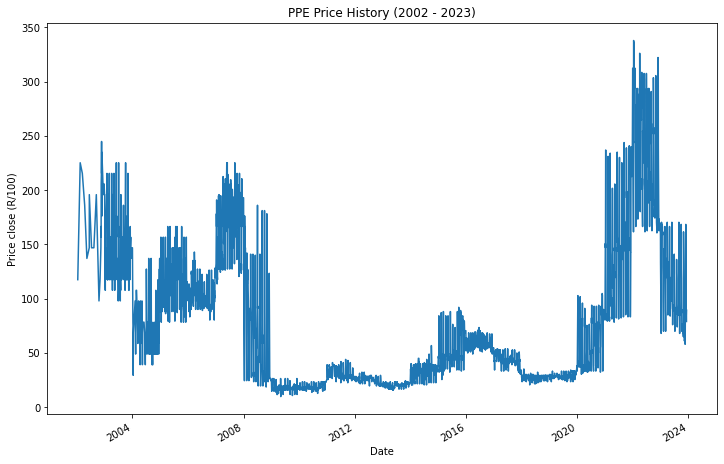

In [55]:
df['Close'].plot(figsize=(12,8),
        title="PPE Price History (2002 - 2023)",
       ylabel = "Price close (R/100)")

<AxesSubplot:ylabel='Density'>

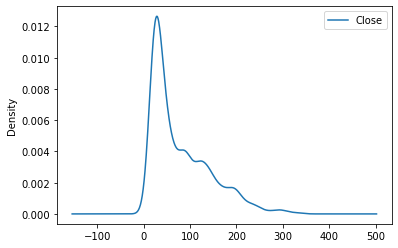

In [56]:
df.plot.kde()

## Calculate Estimated Expected Returns


In [58]:
# calculate ppe daily returns
df['returns'] = (df['Close'] / df['Close'].shift(1)) - 1

<AxesSubplot:title={'center':'PPE Returns History (2002 - 2023)'}, xlabel='Date', ylabel='Returns (%)'>

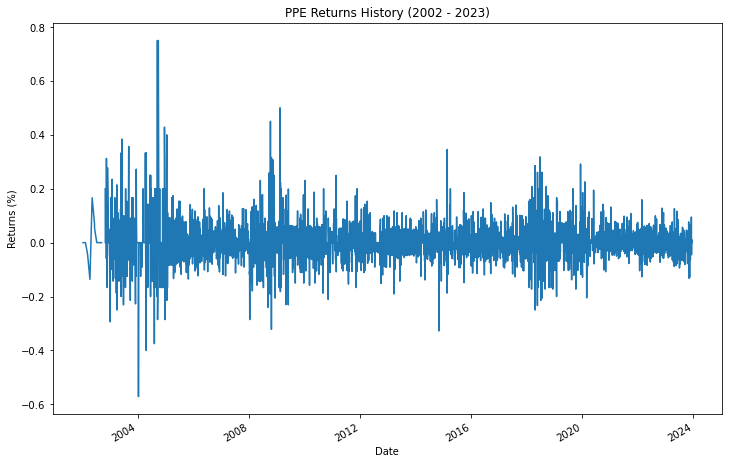

In [59]:
df['returns'].plot(figsize=(12,8),
        title="PPE Returns History (2002 - 2023)",
       ylabel = "Returns (%)")

In [60]:
# calculate expected return 
exp_return = df['returns'].mean()
print(f"{exp_return:.3%}")

0.197%


Purple Group has a daily expected return of 0.197%. Now to anualise the expecte returns.

- multiply by 250 (approximate number of trading days in a year)
- Compounding the daily return over 250 days.

In [61]:
annual_exp_return = ((1+exp_return)**(250)) - 1
annual_exp_return

0.634658123050968

In [62]:
annual_exp_return2 = exp_return * 250
annual_exp_return2

0.4919170142121305

Calculate moving average for expected returns.
- 7 day moving average
- 30 day moving average

In [63]:
# 7 day moving average
df['exp_return_7'] = df['returns'].rolling(7).mean()
df['exp_return_30'] = df['returns'].rolling(30).mean()
df['exp_return_90'] = df['returns'].rolling(90).mean()

In [64]:
df.head(30)

,Close,returns,exp_return_7,exp_return_30,exp_return_90
Date,,,,,
2002-10-17 17:00:00,97.95,NaN,NaN,NaN,NaN
2002-10-30 17:00:00,117.54,0.200000,NaN,NaN,NaN
2002-10-31 17:00:00,117.54,0.000000,NaN,NaN,NaN
2002-01-11 17:00:00,117.54,0.000000,NaN,NaN,NaN
2002-05-11 17:00:00,137.13,0.166667,NaN,NaN,NaN
2002-06-11 17:00:00,146.93,0.071465,NaN,NaN,NaN
2002-07-11 17:00:00,146.93,0.000000,NaN,NaN,NaN
2002-08-11 17:00:00,146.93,0.000000,0.062590,NaN,NaN
2002-11-11 17:00:00,146.93,0.000000,0.034019,NaN,NaN


<AxesSubplot:title={'center':'PPE Returns History (2002 - 2023)'}, xlabel='Date', ylabel='Returns (%)'>

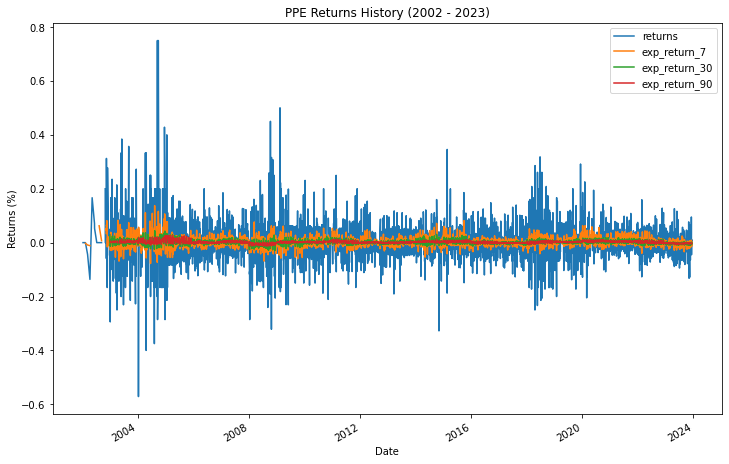

In [43]:
df[['returns',"exp_return_7","exp_return_30","exp_return_90"]].plot(figsize=(12,8),
        title="PPE Returns History (2002 - 2023)",
       ylabel = "Returns (%)")

## State Contigent Expected Returns

The mean based Expected Return is limited by the fact that is based entirely on historic data/information. The historic performance of a stock is not a solid indicator that it will continue with that performance in the future. 

State Contingent Expected Returns are used to overcome this limitation. They are expected returns contingent on a given state occuring. This method is only as good as the accuracy of:
* anticipated returns, and
* probabilities of occurrences.


## Asset Pricing Models
Asset Pricing Models remove some of the subjective issues involved in the estimation of expected returns. APMs are tools that use math and logic to determine the expected return of financial securities. The APMs rely on :
* **linearity**: equation of a straight line or regression
* **perfect information**: assumes that all investors have the access to the same information. 
* **efficient markets**: all information is immediately reflected in the prices of securities.


$$
    E[r_j] = r_f + \beta_j(E[r_m] - r_f )
$$
**Where**:

$E[r_jt]$ = Expected return on a stock j

$E[r_m]$ = Expected return on the market

$r_f$ = Risk free rate (e.g. Yield of T-bills or T-bonds)

$\beta_j$ = Systematic risk (market risk) of stock j

### Calculate Expected Returns of Stock with CAPM

$$
    E[r_{GOOGL}] = r_f + \beta_{GOOGL}(E[r_m] - r_f)
$$

**Where**:
E[r_{GOOGL}]

In [3]:
sp500 = pd.read_csv("data/SP_500_price_data.csv")
sp500.head()

,Date,Close
0,17/10/2002 16:00:00,879.20
1,18/10/2002 16:00:00,884.39
2,21/10/2002 16:00:00,899.72
3,22/10/2002 16:00:00,890.16
4,23/10/2002 16:00:00,896.14


In [5]:
sp500_expected = getExpectedReturn(sp500, "Close")
sp500_expected

0.10213321897288585

In [8]:
risk_free_rate = 0.0384
expected_return_GOOGL = risk_free_rate + (1.0537*(0.6302 - risk_free_rate))
expected_return_GOOGL

0.6619796600000001